<a href="https://colab.research.google.com/github/ahn283/finance/blob/main/pytorch_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 학습 코드를 실행하기 전에 <b>[런타임]</b> - <b>[런타임 유형 변경]</b>에서 하드웨어 가속기를 <b>[GPU]</b>로 설정한다.

### <b>데이터 세트 다운로드</b>

* 딥러닝 모델 학습 과정에서 필요한 데이터 세트를 불러온다.

In [12]:
!git clone https://github.com/ndb796/weather_dataset
%cd weather_dataset

Cloning into 'weather_dataset'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1117 (delta 0), reused 3 (delta 0), pack-reused 1111
Receiving objects: 100% (1117/1117), 85.23 MiB | 60.27 MiB/s, done.
/content/weather_dataset/weather_dataset


### <b>라이브러리 불러오기(Load Libraries)</b>

* 딥러닝 모델 학습 과정에서 필요한 라이브러리를 불러온다.

In [13]:
import torch
import torchvision  # 이미지 처리
import torchvision.transforms as transforms   # 학습 데이터 증진
import torchvision.models as models   # 모델 라이브러리
import torchvision.datasets as datasets # 데이터셋 정리

import torch.optim as optim   # optimizer
import torch.nn as nn   # deep learning model 정의
import torch.nn.functional as F
from torch.utils.data import random_split

import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np

### <b>데이터 세트 불러오기(Load Dataset)</b>

1. <b>데이터 증진(data augmentation)</b>을 명시하여 초기화할 수 있다.
  * 이미지를 불러올 때 어떤 방법(회전, 자르기, 뒤집기 등)을 사용할 것인지 명시한다.
2. 이후에 <b>DataLoader()</b>를 이용하여 실질적으로 데이터를 불러올 수 있다.
  * 어떤 데이터를 사용할 것인지, 배치 크기(batch size), 데이터 셔플(shuffle) 여부 등을 명시한다.
  * <b>next() 함수</b>를 이용하여 tensor 형태로 데이터를 배치 단위로 얻을 수 있다.
* <b>Reference</b>: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

In [14]:
transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5] 
    )
])

transform_val = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

transform_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [15]:
train_dataset = datasets.ImageFolder(
    root='train/',
    transform=transform_train
)
dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
test_dataset = datasets.ImageFolder(
    root='test/',
    transform=transform_test
)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

### <b>데이터 시각화(Data Visualization)</b>

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.5451,  ..., -1.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.7882,  ..., -0.3333,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.7725,  ..., -0.2078,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.7333,  ..., -0.7020,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

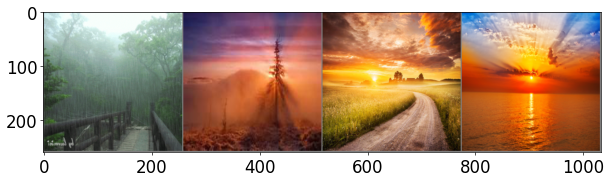

['Rain', 'Sunrise', 'Sunrise', 'Sunrise']


In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size' : 20})

def imshow(input):
  # torch.Tensor => numpy
  input = input.numpy().transpose((1, 2, 0))    # pytorch numpy (ch, width, height) 순이므로 넘파이에 맞춰서 변경
  # undo image normalization
  mean = np.array([0.5, 0.5, 0.5])
  std = np.array([0.5, 0.5, 0.5])
  input = std * input + mean
  input = np.clip(input, 0, 1)
  # display images
  plt.imshow(input)
  plt.show()

class_names = {
    0: 'Cloudy',
    1: 'Rain',
    2: 'Shine',
    3: 'Sunrise'
}

# load a batch of train image
iterator = iter(train_dataloader)

# visualize a batch of train image
imgs, labels = next(iterator)
out = torchvision.utils.make_grid(imgs[:4])
print(out)
imshow(out)
print([class_names[labels[i].item()] for i in range(4)])

### <b>딥러닝 모델 학습(Training)</b>

* 자신이 직접 정의한 뉴럴 네트워크를 이용하여 데이터 세트에 대한 학습이 가능하다.
  * 레이어의 깊이를 늘려 가며, 파라미터의 개수를 증가시킬 수 있다.

In [39]:
class Model1(nn.Module):

    # 이미지를 입력 받아 4개의 결과를 출력하는 2층 선형 모델
    def __init__(self):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(256 * 256 *3, 4)     # 입력 3차원(256 * 256 * 3), 출력 1차원(4)
        self.flatten = nn.Flatten()
      
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        return x

class Model2(nn.Module):
    # 선형 은닉층 추가
    def __init__(self):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(256 * 256 * 3, 64)
        self.linear2 = nn.Linear(64, 4)
        self.flatten = nn.Flatten()
      
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.linear2(x)
        return x

class Model3(nn.Module):
    # dropout 층 추가
    def __init__(self):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(256 * 256 * 3, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.linear2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.linear3 = nn.Linear(64, 32)
        self.dropout3 = nn.Dropout(0.5)
        self.linear4 = nn.Linear(32, 4)
        self.flatten = nn.Flatten()
    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = self.dropout2(x)
        x = F.relu(self.linear3(x))
        x = self.dropout3(x)
        x = self.linear4(x)
        return x


In [21]:
import time

def train():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Training]')
    model.train()     # 학습 모드로 변경
    total = 0   # 전체
    running_loss = 0.0  
    running_corrects = 0  # 맞춘 개수

    for i, batch in enumerate(train_dataloader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        outputs = model(imgs)
        optimizer.zero_grad()
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()   # 기울기 계산
        optimizer.step()  # 모델 업데이트

        total += labels.shape[0] 
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if i % log_step == log_step - 1:
            print(f'[Batch: {i + 1}] running train loss: {running_loss / total}, running train accuracy: {running_corrects / total}')

    print(f'train loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print('elapsed time:', time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()

def validate():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Validation]')
    model.eval()    # model -> eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(val_dataloader):

        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
        
        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if (i == 0) or (i % log_step == log_step - 1):
            print(f'[Batch: {i + 1}] running val loss: {running_loss / total}, running val accuracy: {running_corrects / total}')
    
    print(f'val loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print('elapsed time:', time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()
  

def test():
    start_time = time.time()
    print(f'[Test]')
    model.eval()    # model eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(test_dataloader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if (i == 0) or (i % log_step == log_step - 1):
            print(f'[Batch: {i + 1}] running test loss: {running_loss / total}, running test accuracy: {running_corrects / total}')

    print(f'test loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()



In [19]:
import time

def adjust_learning_rate(optimizer, epoch):

    lr = learning_rate
    if epoch >= 3:
        lr /= 10    # 3번째 이상 이터레이션부터 lr 1/10로 감소
    if epoch >=7:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

### <b>학습 결과 확인하기</b>

* 학습 결과를 시각화하여 정상적으로 모델이 학습되었는지 확인한다.

[Epoch: 1 - Training]
train loss: 0.21306852393680148, accuracy: 0.6281481385231018
elapsed time: 7.367141485214233
[Epoch: 1 - Validation]
[Batch: 1] running val loss: 0.27036136388778687, running val accuracy: 0.671875
val loss: 0.2601663431472327, accuracy: 0.692307710647583
elapsed time: 2.7007641792297363
[Info] best validation accuracy!
[Epoch: 2 - Training]
train loss: 0.23417480186179832, accuracy: 0.6933333277702332
elapsed time: 7.3101582527160645
[Epoch: 2 - Validation]
[Batch: 1] running val loss: 0.2911190986633301, running val accuracy: 0.59375
val loss: 0.26677842111982536, accuracy: 0.6508876085281372
elapsed time: 2.625127077102661
[Epoch: 3 - Training]
train loss: 0.2007003911336263, accuracy: 0.7288888692855835
elapsed time: 7.3438880443573
[Epoch: 3 - Validation]
[Batch: 1] running val loss: 0.32864809036254883, running val accuracy: 0.6875
val loss: 0.2637223209855119, accuracy: 0.6982248425483704
elapsed time: 2.6188747882843018
[Info] best validation accuracy!
[E

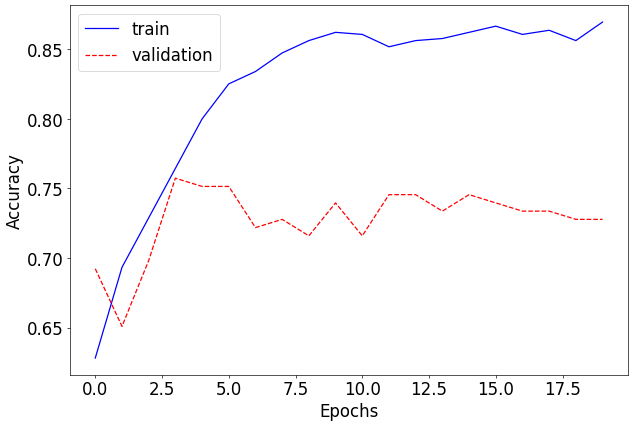

In [24]:
learning_rate = 0.01
log_step = 20

model = Model1()
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 20
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []
for epoch in range(num_epochs):
    adjust_learning_rate(optimizer, epoch)
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss, val_loss))
    accuracy.append((train_acc, val_acc))

    if val_acc > best_val_acc:    # best accuravy 저장
        print('[Info] best validation accuracy!')
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), f"best_checkpoint_epoch_{epoch + 1}.pth")

torch.save(model.state_dict(), f"last_check_epoch_{num_epochs}.pth")

plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

test_loss, test_accuracy = test()
print(f'Test loss: {test_loss:.8f}')
print(f'Test accuracy: {test_accuracy * 100.:.2f}%')

[Epoch: 1 - Training]
train loss: 0.16772575201811613, accuracy: 0.5244444608688354
elapsed time: 7.279634952545166
[Epoch: 1 - Validation]
[Batch: 1] running val loss: 0.3095986545085907, running val accuracy: 0.421875
val loss: 0.32259604211389664, accuracy: 0.4792899489402771
elapsed time: 2.4764246940612793
[Info] best validation accuracy!
[Epoch: 2 - Training]
train loss: 0.2988598816483109, accuracy: 0.517037034034729
elapsed time: 7.237247467041016
[Epoch: 2 - Validation]
[Batch: 1] running val loss: 0.38364580273628235, running val accuracy: 0.53125
val loss: 0.579379888681265, accuracy: 0.5798816680908203
elapsed time: 2.4866044521331787
[Info] best validation accuracy!
[Epoch: 3 - Training]
train loss: 0.6004476547241211, accuracy: 0.585185170173645
elapsed time: 7.329038381576538
[Epoch: 3 - Validation]
[Batch: 1] running val loss: 0.42809590697288513, running val accuracy: 0.578125
val loss: 0.43928591034116127, accuracy: 0.6213017702102661
elapsed time: 2.510674238204956
[

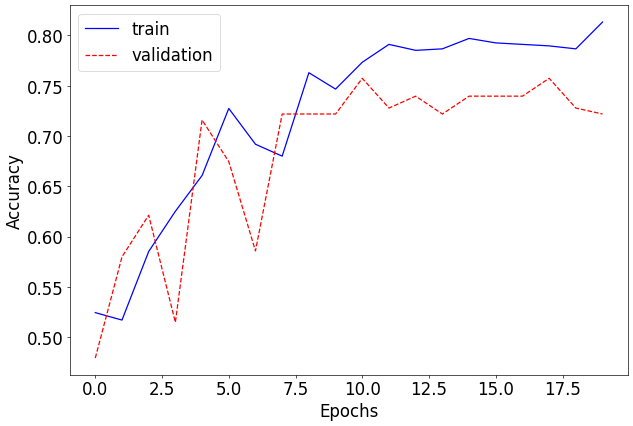

In [28]:
learning_rate = 0.01
log_step = 20

model = Model2()
model = model.cuda()

criteirion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 20
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []
for epoch in range(num_epochs):
    adjust_learning_rate(optimizer, epoch)
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss, val_loss))
    accuracy.append((train_acc, val_acc))

    if val_acc > best_val_acc:
          print('[Info] best validation accuracy!')
          best_val_acc = val_acc
          best_epoch = epoch
          torch.save(model.state_dict(), f"best_checkpoint_epoch_{epoch + 1}.pth")

torch.save(model.state_dict(), f"last_checkpoint_epoch_{num_epochs}.pth")

plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

test_loss, test_accuracy = test()
print(f'Test loss: {test_loss:.8f}')
print(f'Test accuracy: {test_accuracy * 100.:.2f}%')

[Epoch: 1 - Training]
train loss: 0.020200793301617656, accuracy: 0.4000000059604645
elapsed time: 7.383767604827881
[Epoch: 1 - Validation]
[Batch: 1] running val loss: 0.01362762600183487, running val accuracy: 0.578125
val loss: 0.014874692146594707, accuracy: 0.6213017702102661
elapsed time: 2.4957919120788574
[Info] best validation accuracy!
[Epoch: 2 - Training]
train loss: 0.017053989745952465, accuracy: 0.5318518280982971
elapsed time: 7.3554956912994385
[Epoch: 2 - Validation]
[Batch: 1] running val loss: 0.011190194636583328, running val accuracy: 0.703125
val loss: 0.012550144153233815, accuracy: 0.7041420340538025
elapsed time: 2.495781183242798
[Info] best validation accuracy!
[Epoch: 3 - Training]
train loss: 0.01584073137353968, accuracy: 0.5970370173454285
elapsed time: 7.318583250045776
[Epoch: 3 - Validation]
[Batch: 1] running val loss: 0.011690850369632244, running val accuracy: 0.703125
val loss: 0.0124504386320622, accuracy: 0.7100591659545898
elapsed time: 2.5106

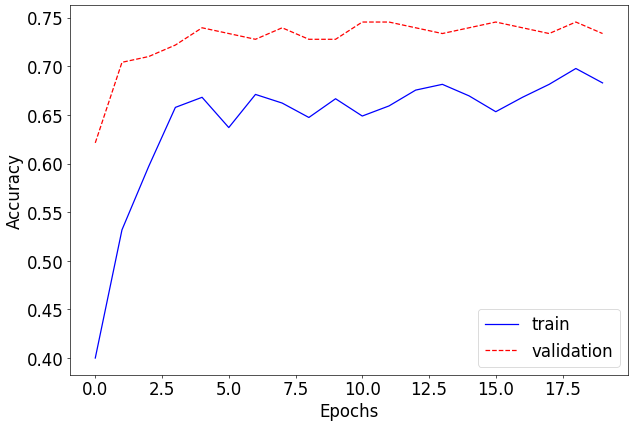

In [41]:
learning_rate = 0.01
log_step = 20

model = Model3()
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 20
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []
for epoch in range(num_epochs):
    adjust_learning_rate(optimizer, epoch)
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss, val_loss))
    accuracy.append((train_acc, val_acc))

    if val_acc > best_val_acc:
        print("[Info] best validation accuracy!")
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), f'best_checkpoint_epoch_{epoch + 1}.pth')

torch.save(model.state_dict(), f'last_checkpoint_epoch_{num_epochs}.pth')

plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

test_loss, test_accuracy = test()
print(f'Test loss: {test_loss:.8f}')
print(f'Test accuracy: {test_accuracy * 100.:.2f}%')